# NLP based Project on News Group Dataset

importing dependencies

In [32]:
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from nltk import sent_tokenize, word_tokenize ,line_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk import pos_tag
from nltk.corpus import wordnet
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

importing the dataset considering only 3 categories to getdataset  

In [2]:
categories_3 = ['talk.religion.misc', 'comp.graphics', 'sci.space']
dataset = fetch_20newsgroups(categories =categories_3)

### Exploring the dataset

In [3]:
dataset.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [4]:
print(dataset['data'][0])

From: nicho@vnet.IBM.COM (Greg Stewart-Nicholls)
Subject: Re: Biosphere II
Reply-To: nicho@vnet.ibm.com
Disclaimer: This posting represents the poster's views, not those of IBM
News-Software: UReply 3.1
X-X-From: nicho@vnet.ibm.com
            <1q1kia$gg8@access.digex.net>
Lines: 18

In <1q1kia$gg8@access.digex.net> Pat writes:
>In article <19930408.043740.516@almaden.ibm.com> nicho@vnet.ibm.com writes:
>>In <1q09ud$ji0@access.digex.net> Pat writes:
>>>Why is everyone being so critical of B2?
>> Because it's bogus science, promoted as 'real' science.
>It seems to me, that it's sorta a large engineering project more
>then a science project.
  Bingo.
>B2 is not bench science,  but rather a large scale attempt to
>re-create a series of micro-ecologies.   what's so eveil about this?
 Nothing evil at all. There's no actual harm in what they're doing, only
how they represent it.

 -----------------------------------------------------------------
 .sig files are like strings ... every yo-yo's

In [5]:
#unique values of target 
np.unique(dataset.target)

array([0, 1, 2], dtype=int64)

In [6]:
#length of dataset
lengthdata = len(dataset['data'])
lengthdata

1554

In [7]:
# splitting dataset into test train

train_data = dataset['data'][:1000]
train_target = dataset['target'][:1000]
test_data = dataset['data'][1000:]
test_target = dataset['target'][1000:]

In [8]:
# making list of stop words

stop = stopwords.words('english')
puntiations = list(string.punctuation)
stop = stop+puntiations
stop = stop+['--','...','\'\'','``']

In [9]:
#defining lemmatizer and count vector object for further use

lemmatizer = WordNetLemmatizer()
count_vector_sw = CountVectorizer(stop_words=stop, max_features=800)

In [10]:
# User defined function clean_document() requiring a list of data and converting the data to make sure words in data are 
# lemmatized , all numeric and not stop words

def clean_document(data):
    data_cleaned = []
    for doc in data:
        doc = doc.lower()
        doc_cleaned = ' '.join(lemmatizer.lemmatize(word) for word in doc.split() if word.isalpha() and not word in stop )
        data_cleaned.append(doc_cleaned)
    return data_cleaned

In [11]:
# User defined function to perform fit_transform the data on CountVectorizer object

def form_count_vector(clean_data):
    return count_vector_sw.fit_transform(clean_data)

### Training Data

In [12]:
#cleaning test data
#making a countvector of the count vector

clean_data = clean_document(train_data)
data_cleaned_count = form_count_vector(clean_data)

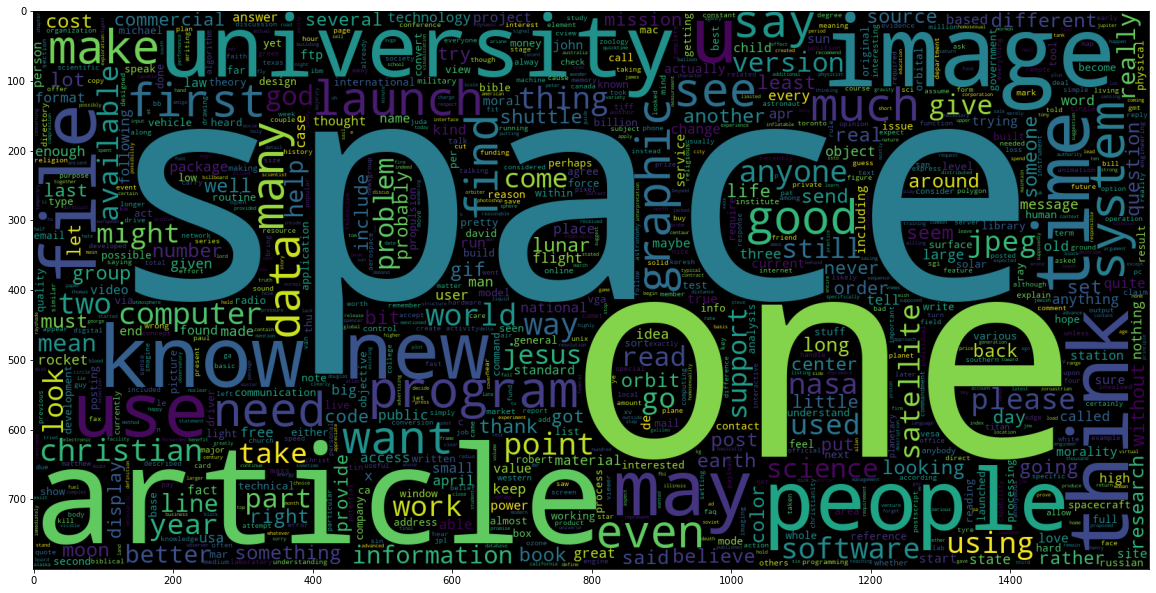

In [31]:
data_neg = clean_data
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , collocations = False).generate(" ".join(data_neg))
plt.imshow(wc)

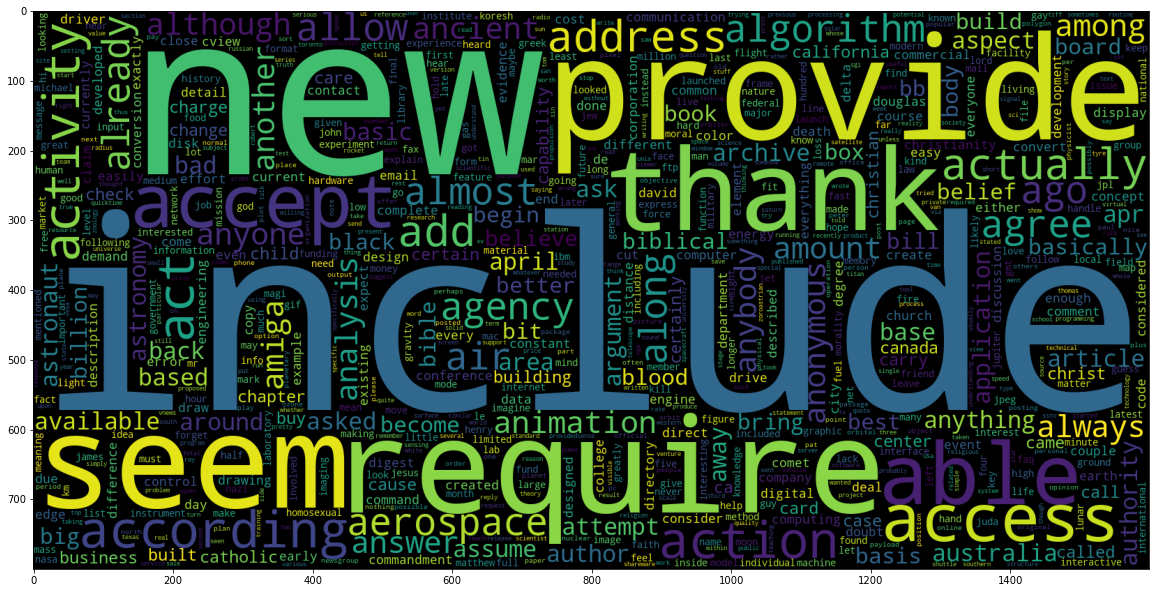

In [28]:
# all the feature names which are important in the dataset
data_neg = count_vector_sw.get_feature_names()
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , collocations = False).generate(" ".join(data_neg))
plt.imshow(wc)

### Testing Data

In [14]:
# cleaning testing data
clean_test = clean_document(test_data)
test_clean_count = count_vector_sw.transform(clean_test)

# Predicting and checking Scores on different predefined model

### RandomForrest()

In [37]:
randomforest = RandomForestClassifier()
randomforest.fit(data_cleaned_count,train_target)
randomforest_score = randomforest.score(test_clean_count,test_target)
randomforest_correct = collections.Counter(randomforest.predict(test_clean_count)-test_target)[0]
print("RandomForrest performed on",lengthdata-1000,"data points with:",
      "\nSCORE =",randomforest_score,
      "\nCorrect Predictions",randomforest_correct,
      "\nIncorrect Predictions",lengthdata-1000-randomforest_correct)

RandomForrest performed on 554 data points with: 
SCORE = 0.927797833935018 
Correct Predictions 514 
Incorrect Predictions 40


### SVC()

In [36]:
svc = SVC()
svc.fit(data_cleaned_count,train_target)
svc_score = svc.score(test_clean_count,test_target)
svc_correct = collections.Counter(svc.predict(test_clean_count)-test_target)[0]
print("SVC performed on",lengthdata-1000,"data points with:",
      "\nSCORE =",svc_score,
      "\nCorrect Predictions",svc_correct,
      "\nIncorrect Predictions",lengthdata-1000-svc_correct)

SVC performed on 554 data points with: 
SCORE = 0.8267148014440433 
Correct Predictions 458 
Incorrect Predictions 96


### LogisticRegression()

In [38]:
logr = LogisticRegression()
logr.fit(data_cleaned_count,train_target)
logr_score = logr.score(test_clean_count,test_target)
logr_correct = collections.Counter(logr.predict(test_clean_count)-test_target)[0]
print("Logistic Regression performed on",lengthdata-1000,"data points with:",
      "\nSCORE =",logr_score,
      "\nCorrect Predictions",logr_correct,
      "\nIncorrect Predictions",lengthdata-1000-logr_correct )

Logistic Regression performed on 554 data points with: 
SCORE = 0.9187725631768953 
Correct Predictions 509 
Incorrect Predictions 45
